In [1]:
import tensorflow
from tensorflow.keras import layers , models

In [35]:
# build model by self for practices and modify the model

# Inception ResNet-A block
def inception_resnet_a(x, scale=0.1):
  sortcut = x

  # branch 1
  b1 = layers.Conv2D(32, 1, padding='same', activation='relu')(x)

  # branch 2
  b2 = layers.Conv2D(32, 1, padding='same', activation='relu')(x)
  b2 = layers.Conv2D(32, 3, padding='same', activation='relu')(b2)

  # branch 3
  b3 = layers.Conv2D(32, 1, padding='same', activation='relu')(x)
  b3 = layers.Conv2D(32, 3, padding='same', activation='relu')(b3)
  b3 = layers.Conv2D(32, 3, padding='same', activation='relu')(b3)

  # concatenate and project
  mixed = layers.Concatenate()([b1, b2, b3])
  up = layers.Conv2D(x.shape[-1], 1, padding='same', activation='relu')(mixed)
  up = layers.Lambda(lambda s: s * scale)(up)

  # residual connection add
  x = layers.add([x, up])
  x = layers.Activation('relu')(x)

  return x


# Reduction A
def reduction_a(x, k=256, l=256, m=384, n=384):
  sortcut = x

  # branch 1
  b1 = layers.MaxPooling2D(3, strides=2, padding='valid')(x)

  # branch 2
  b2 = layers.Conv2D(n, 3, strides=2, padding='valid', activation='relu')(x)

  # branch 3
  b3 = layers.Conv2D(k, 1, activation='relu')(x)
  b3 = layers.Conv2D(l, 3, padding='same', activation='relu')(b3)
  b3 = layers.Conv2D(m, 3 , strides=2, padding='valid', activation='relu')(b3)

  # concatenate and project
  mixed = layers.Concatenate()([b1, b2 ,b3])

  return mixed


# Inception ResNet-B
def inception_resnet_b(x, scale=0.1):
  sortcut = x

  # branch 1
  b1 = layers.Conv2D(128, 1, padding='same', activation='relu')(x)

  # branch 2
  b2 = layers.Conv2D(128, 1, padding='same', activation='relu')(x)
  b2 = layers.Conv2D(128, (1, 7), padding='same', activation='relu')(b2)
  b2 = layers.Conv2D(128, (7, 1), padding='same', activation='relu')(b2)

  # concatenate and project
  mixed = layers.Concatenate()([b1, b2])
  up = layers.Conv2D(x.shape[-1], 1, padding='same', activation='relu')(mixed)
  up = layers.Lambda(lambda s: s * scale)(up)

  # residual connection add
  x = layers.add([x, up])
  x = layers.Activation('relu')(x)

  return x


# stem block
def stem(inputs):
  x = layers.Conv2D(32, 3, strides=2, padding='valid', activation='relu')(inputs)
  x = layers.Conv2D(32, 3, padding='valid', activation='relu')(x)
  x = layers.Conv2D(64, 3, padding='valid', activation='relu')(x)
  x = layers.MaxPooling2D(3, strides=2, padding='valid')(x)
  x = layers.Conv2D(80, 1, padding='valid', activation='relu')(x)
  x = layers.Conv2D(192, 3, padding='valid', activation='relu')(x)
  x = layers.Conv2D(256, 3, strides=2, padding='valid', activation='relu')(x)

  return x



# Inception ResNet v1
def inception_resnet_v1(input_shape=(299,299,3),num_classes = 1000):
  inputs = layers.Input(shape=input_shape)

  # stem
  x = stem(inputs)

  # 5 x Incertion ResNet A
  for _ in range(5):
    x = inception_resnet_a(x)

  # Reduction A
  x = reduction_a(x)

  # 10 x Incertion ResNet B
  for _ in range(10):
    x = inception_resnet_b(x)

  # Global Average pooling
  x = layers.GlobalAveragePooling2D()(x)
  x = layers.Dropout(0.8)(x)
  x = layers.Dense(num_classes, activation='softmax')(x)

  model = models.Model(inputs, x)

  return model


model = inception_resnet_v1()
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_777 (Conv2D) │ (None, 149, 149,  │        896 │ input_layer_12[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_778 (Conv2D) │ (None, 147, 147,  │      9,248 │ conv2d_777[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_779 (Conv2D) │ (None, 145, 145,  │     18,496 │ conv2d_778[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_26    │ (None, 72, 72,    │          0 │ conv2d_779[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_780 (Conv2D) │ (None, 72, 72,    │      5,200 │ max_pooling2d_26… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_781 (Conv2D) │ (None, 70, 70,    │    138,432 │ conv2d_780[0][0]  │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_782 (Conv2D) │ (None, 34, 34,    │    442,624 │ conv2d_781[0][0]  │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_786 (Conv2D) │ (None, 34, 34,    │      8,224 │ conv2d_782[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_784 (Conv2D) │ (None, 34, 34,    │      8,224 │ conv2d_782[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_787 (Conv2D) │ (None, 34, 34,    │      9,248 │ conv2d_786[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_783 (Conv2D) │ (None, 34, 34,    │      8,224 │ conv2d_782[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_785 (Conv2D) │ (None, 34, 34,    │      9,248 │ conv2d_784[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_788 (Conv2D) │ (None, 34, 34,    │      9,248 │ conv2d_787[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_81      │ (None, 34, 34,    │          0 │ conv2d_783[0][0], │
│ (Concatenate)       │ 96)               │            │ conv2d_785[0][0], │
│                     │                   │            │ conv2d_788[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_789 (Conv2D) │ (None, 34, 34,    │     24,832 │ concatenate_81[0… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 12,004,248 (45.79 MB)

 Trainable params: 12,004,248 (45.79 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
from tensorflow.keras.applications.inception_resnet_v2 import (InceptionResNetV2, preprocess_input, decode_predictions)

In [42]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [43]:
# load pre-trained model
model = InceptionResNetV2(weights='imagenet')

In [44]:
model.summary()

Model: "inception_resnet_v2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13      │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_872 (Conv2D) │ (None, 149, 149,  │        864 │ input_layer_13[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_872[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_288      │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_873 (Conv2D) │ (None, 147, 147,  │      9,216 │ activation_288[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_873[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_289      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_874 (Conv2D) │ (None, 147, 147,  │     18,432 │ activation_289[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_874[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_290      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_28    │ (None, 73, 73,    │          0 │ activation_290[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_875 (Conv2D) │ (None, 73, 73,    │      5,120 │ max_pooling2d_28… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_875[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_291      │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_876 (Conv2D) │ (None, 71, 71,    │    138,240 │ activation_291[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_876[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_292      │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 55,873,736 (213.14 MB)

 Trainable params: 55,813,192 (212.91 MB)

 Non-trainable params: 60,544 (236.50 KB)

In [49]:
img = image.load_img('Norwegian elkhound dog.jpeg', target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [50]:
pred = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


In [51]:
label = decode_predictions(pred,top=1)[0][0][1]

In [52]:
label

'Norwegian_elkhound'

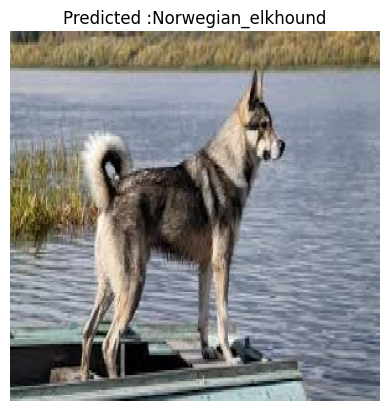

In [53]:
# show image
plt.imshow(img)
plt.title(f"Predicted :{label}")
plt.axis('off')
plt.show()